In [7]:
%matplotlib inline
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
plt.style.use('seaborn-white')

In [3]:
docs = []  # list with documents
doc_names = [] # doc names with same index as docs
links = []
sample_seed = 2017
data_folder = 'dblp_v10'  # aminer_org_v1
sample_size = 50000

data_path = os.path.join(os.getcwd(), '../data.tmp', data_folder)
with open(os.path.join(data_path, 'texts.txt'), 'r', encoding='utf8') as f:
    for line in f:
        line = line.split(' ')
        doc_names.append(line[0])
        docs.append(' '.join(line[1:]))

In [5]:
doc_names_set = set(doc_names)

280 ms ± 63.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
doc_names_indexes = {k:v for v, k in enumerate(doc_names)}

In [29]:
links = []
links_try_catch = []
index_time = 0
in_set_time = 0
try_catch_time = 0

with open(os.path.join(data_path, 'links.txt'), 'r', encoding='utf8') as f:
    for line in f:
        line = line.strip().split(' ')
        link = []
        for l in line[1:]:
            try:
                link.append(doc_names_indexes[l])
            except KeyError:
                pass
        links.append(link)

In [30]:
links[0]

[1446990, 1459782, 654850, 50423, 420116, 190346, 328004]

In [3]:
print('Number of docs:     ', len(docs))
print('Number of doc_names:', len(doc_names))
print('Number of links:    ', len(links))

Number of docs:      1567300
Number of doc_names: 1567300
Number of links:     1567300


In [13]:
strategy="expand"
data_cache = os.path.join(data_path, '_'.join(['', strategy,  str(sample_size), str(sample_seed)])) + '.p'
import os
os.path.exists(data_cache)

False

Counter({0: 18525,
         1: 43710,
         2: 75337,
         3: 110440,
         4: 134725,
         5: 141629,
         6: 126744,
         7: 113572,
         8: 99327,
         9: 87759,
         10: 77311,
         11: 67523,
         12: 58601,
         13: 51000,
         14: 44166,
         15: 38844,
         16: 33760,
         17: 29798,
         18: 25604,
         19: 22573,
         20: 19861,
         21: 17531,
         22: 15129,
         23: 13293,
         24: 11726,
         25: 10434,
         26: 8983,
         27: 7990,
         28: 6860,
         29: 6010,
         30: 5335,
         31: 4722,
         32: 4065,
         33: 3615,
         34: 3197,
         35: 2809,
         36: 2531,
         37: 2122,
         38: 1966,
         39: 1731,
         40: 1460,
         41: 1356,
         42: 1150,
         43: 1055,
         44: 934,
         45: 803,
         46: 807,
         47: 692,
         48: 581,
         49: 494,
         50: 470,
         51: 479,

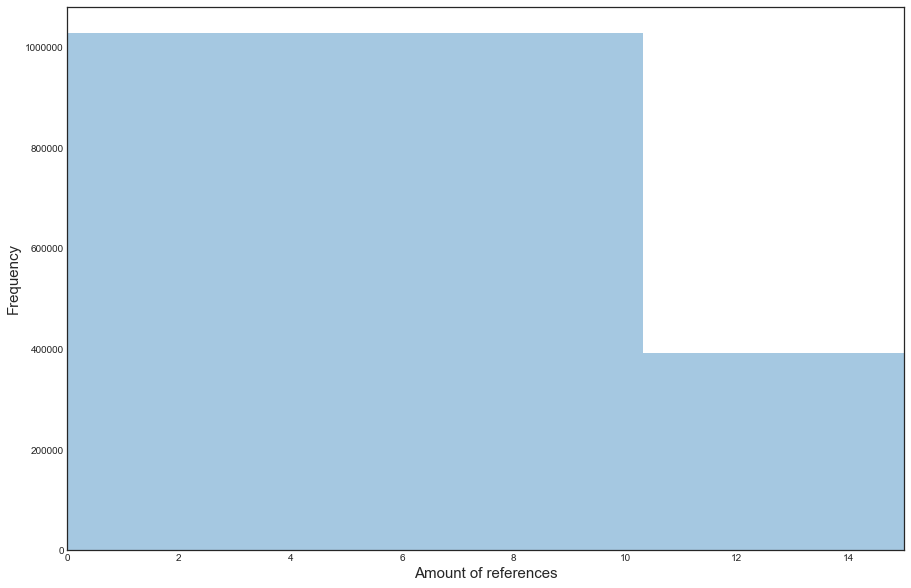

In [7]:
from collections import Counter
numbers_of_links = [len(l) for l in links]

plt.figure(figsize=(15,10))
distplot_ax = sns.distplot(numbers_of_links, hist=True, kde=False, bins=100)
distplot_ax.set_xlim(0,15)
# distplot_ax.set_ylim(0,64000)
# distplot_ax.set_xticks(range(16))
# distplot_ax.tick_params(labelsize=15)
distplot_ax.set_xlabel('Amount of references', fontsize=15)
distplot_ax.set_ylabel('Frequency', fontsize=15)
Counter(numbers_of_links)

In [31]:
# np.array(numbers_of_links).mean()
links[0]

['09cb2d7d-47d1-4a85-bfe5-faa8221e644b',
 '10aa16da-3cc8-4af6-9d66-48037e915d76',
 '35cb45c3-9408-4096-ab30-bc2e4de3fb5d',
 '661a342e-a911-4420-b67d-51c75d3b14e9',
 '779553f3-e4c1-456e-bc01-5eb9d9567541',
 'b24ba5c0-fee8-4a3e-9330-17f6564856cd',
 'fd1c676d-1296-4f19-89b4-17c7ecd270f3']

In [ ]:
def candidates(old_sample, new_sample):
    print('creating candidates')
    sample_set = set(old_sample + new_sample)
    cands = []
    for source in new_sample:
        for target in links[doc_names.index(source)]:
            cands.append(target)
    print(len(cands))
    new_candidates = sample_set.union(cands)
    print('done.')
    return new_candidates

In [36]:
def extend():
    start_sample_size = int(sample_size / 100)
    sampled_links = []
    sampled_doc_names = set(np.random.choice(doc_names, start_sample_size, replace=False))
    new_sample = sampled_doc_names.copy()
    while True:
        temp_sample = set()
        for source in new_sample:
            sampled_doc_names.add(source)
            print(source)
            for target in links[doc_names_indexes[source]]:
                sampled_links.append((source, target))
                sampled_doc_names.add(target)
                temp_sample.add(target)
                if len(sampled_doc_names) == sample_size:
                    sampled_links = list(set(sampled_links))
                    sampled_doc_names = list(sampled_doc_names)
                    return [docs[doc_names_indexes[sampled_doc_name]] for sampled_doc_name in
                            sampled_doc_names], sampled_doc_names, sampled_links  # docs, doc_names, links
        new_sample = temp_sample.difference(new_sample)

In [37]:
%time docs, doc_names, links = extend()

4e129db3-0887-4cf0-9c11-a813636d0383
54537c8f-625b-4a52-b059-809da5c9c924
84386f3f-836d-4edd-af3a-1bb9e1b2d765
df4368c7-cbb1-4953-bc64-c6d62ceb7623
ce70e1bb-bea1-4b1f-ad7a-a0081b6d8263
58d5c7cf-865a-4241-8a0b-d0dabc93b0e8
bb6f0f8b-69c2-4757-b14e-f656d0358777
6ba6c32b-4456-4c80-a241-dbffc76c3d52
3fd118c5-ee4f-4a3f-8da7-375122a5c4f4
1aeda537-3b29-4d3f-b631-d11a9002fe0a
a1d019e7-7b30-4622-a1b0-e85520dd4ea6
ab57e5e1-2bbe-4ca4-9d9d-1a0112c98520
2727f9a8-d23f-44e4-8157-f64f08fe6825
ae6d8d8f-d83c-4e33-ba4e-5689ef133dd2
d0be3c59-b3a2-4e7c-af77-6002e92a5d2e
b2338ff4-403f-4a82-9010-5c2bd88cad6b
a43a0b81-eab6-426f-9589-5f7013102ab8
563e00c1-2005-4aa7-aed9-5dbec914e72e
862875ff-ac09-4354-9757-6bb7e9a221e2
20ff70e3-8a44-41d0-b4ff-1b84bd3d9ec3
1e30713a-b5d1-43d1-8f17-35f33d0ed122
dabce0d6-119e-4203-9134-1d6cd621bc42
1dc77ace-6e81-49f4-b498-856a98b56e75
a63f783c-5e63-4e83-ba62-0e5dac6c84e1
d035ea98-d372-46c3-9eab-97b370c016a3
7ece6b45-4f2e-48fd-b796-b32a3fbfe177
a61ee267-6c05-4304-802f-9ae7f1c1ff87
d

KeyError: 1523712

('2f3398d6-7f62-406b-a01c-921adef8f800',
 '3d56b3f5-1ad5-4721-bafe-e7f3b2cd69f1')

In [44]:


        

start_sample_size = int(sample_size/100)
old_sample = []
new_sample = list(np.random.choice(doc_names, start_sample_size, replace=False))
while True:
    if len(old_sample) + len(new_sample) >= sample_size:
        # add old_sample including 
    old_sample.extend(new_sample)
    new_sample = list(new_cands)
    new_cands = candidates(new_sample)
    if len(old_sample) + len(new_sample) + len(new_cands) > sample_size:
        old_sample.extend(list(new_cands)[:(sample_size-len(sample))])
        break
    print(len(sample))

creating candidates
5164
done.
6036
creating candidates


KeyboardInterrupt: 

In [4]:
# Strategy = binned
if 0 < sample_size < len(doc_names):
    np.random.seed(sample_seed)
    # choices = np.random.choice(len(docs), sample_size, replace=False)
    # docs = [docs[choice] for choice in choices]
    # doc_names = [doc_names[choice] for choice in choices]
    # links = [links[choice] for choice in choices]  # assumes same order of text and link file!

    # sample using buckets from len(..

    numbers_of_links = [len(l) for l in links]
    bin_limits = [(0, 5), (5, 10), (10, 15), (15, 20), (20, 99999)]
    doc_indices = []

    per_bin_sample_size = int(sample_size / len(bin_limits))

    for bin_lower_limit, bin_upper_limit in bin_limits:
        # don't sample no links
        indices_in_bin = [i for i, v in enumerate(numbers_of_links) if (bin_upper_limit >= v > bin_lower_limit)]
        print(bin_lower_limit, len(indices_in_bin))
        if per_bin_sample_size > len(indices_in_bin):
            print("per_bin_sample_size > len(indices_in_bin)")
            choices = indices_in_bin
        else:
            choices = np.random.choice(indices_in_bin, per_bin_sample_size, replace=False)
        doc_indices.extend(choices)

    target_doc_indices = []
    print(len(doc_indices))
    for doc_index in doc_indices:  # add target docs from links
        target_doc_indices.extend([doc_names.index(ti) for ti in links[doc_index]])
    doc_indices.extend(target_doc_indices)

    print('Final number of docs: ', len(doc_indices))
    docs = [docs[choice] for choice in doc_indices]
    doc_names = [doc_names[choice] for choice in doc_indices]
    links = [links[choice] for choice in doc_indices]  # assumes same order of text and link file!

    # Based on some inverse of PDF
    # counter = Counter(numbers_of_links).items()
    # counts = [c[0] for c in counter]
    # sample_pdf = np.array([1 - c[1] / len(numbers_of_links) for c in counter])
    # sample_pdf /= sum(sample_pdf)
    # samples_per_count = np.random.choice(len(counts), sample_size, replace=True)

temp_links = []
for doc_name, links_per_node in zip(doc_names, links):
    for link in links_per_node:
        temp_links.append((doc_name, link))
links = temp_links

0 64353
5 9017
10 1579
15 406
20 207
1000
Final number of docs:  14744
